In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 한글설정
import matplotlib
# matplotlib.rcParams['font.family'] = 'AppleGothic' # mac용
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # win용
matplotlib.rcParams['font.size'] = 15                # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_excel('score.xlsx', index_col='지원번호')
df = pd.read_csv('drinks.csv', sep=',')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


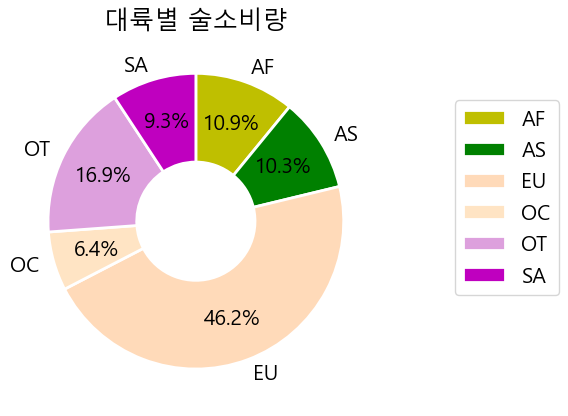

In [3]:
## total_servings 컬럼 추가
## 대륙별 total_servings 원 그래프 출력

# 대륙 빈 값 OT 넣기
df['continent'] = df['continent'].fillna('OT')
# 총 소비량 컬럼 추가
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']
# 대륙별 술 총소비량
c_df = df.groupby('continent')['total_servings'].sum()
df['continent'].unique()


colors = ['y','g','peachpuff','bisque','plum','m']
wedgeprops = {'width':0.6, 'edgecolor':'white', 'linewidth':2}


plt.title('대륙별 술소비량')
plt.pie(c_df, labels=c_df.index, colors=colors, autopct='%.1f%%', startangle=90, counterclock=False, \
        wedgeprops=wedgeprops, pctdistance=0.7)
plt.legend(loc=(1.2,0.3))
plt.show()






In [4]:
## 전체 평균보다 많은 알코올 도수를 섭취하는 대륙 출력


# 1. 전체 알코올 도수 평균
als_df = df['total_litres_of_pure_alcohol'].mean()

# 2. 대륙별 알코올 도수의 평균
al_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()

# 3. 필터
filt = al_df > als_df

# 4. 필터 적용해서 출력
al_df[filt]


continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [5]:
# 평균보다 beer_servings이 가장 높은 대륙
# 대륙별 beer_servings를 높은순으로 출력

df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False).head(1)




continent
EU    193.777778
Name: beer_servings, dtype: float64

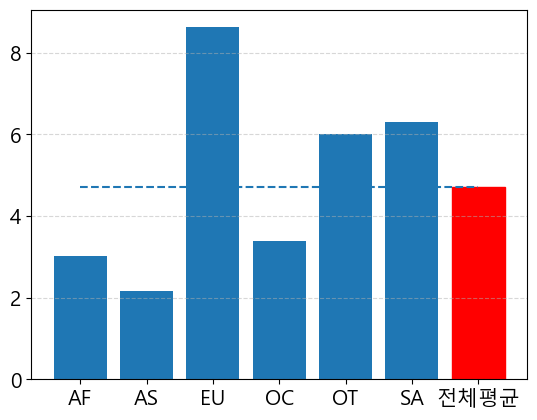

In [6]:
## 대륙별 알코올 도수 막대그래프 출력
## 마지막은 평균 

# 대륙별 알코올 평균 구하기
al_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# 전체 알코올 평균 추가하기
al_df['전체평균'] = df['total_litres_of_pure_alcohol'].mean()
# 바 그래프 출력

plt.plot(al_df.index, [al_df['전체평균']]*7, ls='--')
plt.bar(al_df.index, al_df.values)[len(al_df)-1].set_color('red')
plt.grid(axis='y', ls='--', alpha=0.5)
plt.show()


강사님 내용

In [7]:
# ## 대륙별 total_litres_of_pure_alcohol 막대그래프로 출력하시오.
# ## 마지막에는 평균 막대그래프를 출력하시오.
# # 1. 전체 total_litres_of_pure_alcohol 평균을 구하기
# data = df['total_litres_of_pure_alcohol'].mean()
# n_data = [data]*6
# # 2. 대륙별 total_litres_of_pure_alcohol 평균을 구하기
# # 'AF', 'AS', 'EU', 'OC', 'OT', 'SA'
# con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# con_df
# # 3. 컬럼에 대륙별 평균을 추가하기 mean
# con_df['mean'] = data
# # 4. 막대그래프를 출력
# con_bar = plt.bar(con_df.index,con_df)
# plt.plot(con_df.index,[data]*7,ls="--",color='black')
# plt.grid(axis='y',ls='--',alpha=0.5)  # 격자선
# # con_bar[len(con_df)-1].set_color('red')
# con_bar[len(con_df)-1].set_color('red')